# Домашнее задание № 6

<pre>
ФИО: Никифоров Владимир
</pre>

In [1]:
import numpy as np
import pandas as pd

## Задание 1
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

In [2]:
geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

In [3]:
keywords = pd.read_csv('../data/keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [4]:
def get_region(row):
    for x in geo_data:
        for k in geo_data[x]:
            if k in row['keyword']:
                return x
    return 'undefined'

keywords['region'] = keywords.apply(get_region, axis=1)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [5]:
print('Распределение по регионам:')
keywords['region'].value_counts()

Распределение по регионам:


undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

## Задание 2
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
	- оценка 2 и меньше - низкий рейтинг
	- оценка 4 и меньше - средний рейтинг
	- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [6]:
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
movies = pd.read_csv('../data/ml-latest-small/movies.csv')
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [7]:
def get_class(row):
    if row['rating'] <= 2:
        return 'низкий рейтинг'
    if row['rating'] <= 4:
        return 'средний рейтинг'
    return 'высокий рейтинг'

joined['class'] = joined.apply(get_class, axis=1)
print('Распределение по классам рейтингов:')
joined['class'].value_counts()

Распределение по классам рейтингов:


средний рейтинг    63801
высокий рейтинг    22818
низкий рейтинг     13385
Name: class, dtype: int64

## Задание 3
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [8]:
df = ratings.groupby('userId').count()
kinomans_df = ratings[ ratings['userId'].isin(df[df['movieId'] > 100].reset_index()['userId'].tolist()) ]
print('DataFrame только с киноманами:')
kinomans_df.head()

DataFrame только с киноманами:


,userId,movieId,rating,timestamp
147,4,10,4.0,949810645
148,4,34,5.0,949919556
149,4,112,5.0,949810582
150,4,141,5.0,949919681
151,4,153,4.0,949811346


In [9]:
print(f"Среднее значение Lifetime киноманов равно {kinomans_df.groupby('userId').agg([min, max]).reset_index().apply(lambda x: (x['timestamp']['max']-x['timestamp']['min']), axis=1).mean()/3600/24:.2f} дня.")

Среднее значение Lifetime киноманов равно 463.89 дня.


## Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
	- для каждой строки пройдите по всем годам списка years
	- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
	- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [10]:
years = np.arange(1950,2010+1)

In [11]:
def production_year(row):
    for y in years:
        if str(y) in row['title']:
            return y
    return 1900

In [12]:
joined['year'] = joined.apply(production_year, axis=1)

In [13]:
joined.groupby('year').mean().reset_index()[['year','rating']].sort_values('rating', ascending=False)

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
5,1954,3.994220
2,1951,3.983539
25,1974,3.978704
13,1962,3.952446
1,1950,3.915254
28,1977,3.905786
15,1964,3.841492


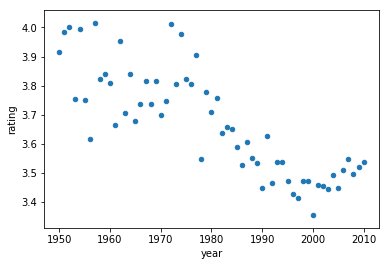

In [17]:
joined[joined['year']>1900].groupby('year').mean().reset_index()[['year','rating']].plot(kind='scatter',x='year',y='rating');

In [18]:
print('Вывод: Да, раньше снимали настоящее кино, не то что сейчас.')

Вывод: Да, раньше снимали настоящее кино, не то что сейчас.
